# **ASSOCIATION RULES**

# Dataset:

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('Online retail.csv')  
df.columns = ['Items']

In [3]:
df.head()

,Items
0,"burgers,meatballs,eggs"
1,chutney
2,"turkey,avocado"
3,"mineral water,milk,energy bar,whole wheat rice..."
4,low fat yogurt


# Data Preprocessing:

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Items   7500 non-null   object
dtypes: object(1)
memory usage: 58.7+ KB


In [5]:
df.isnull().sum()

Items    0
dtype: int64

In [6]:
# Convert the dataset into a list of transactions (splitting by comma)
transactions = df.iloc[:, 0].apply(lambda x: x.split(','))

# Display the first few transactions to verify the transformation
transactions.head()


0                           [burgers, meatballs, eggs]
1                                            [chutney]
2                                    [turkey, avocado]
3    [mineral water, milk, energy bar, whole wheat ...
4                                     [low fat yogurt]
Name: Items, dtype: object

# Association Rule Mining:

In [7]:
!pip install -U mlxtend

     ---------------------------------------- 1.4/1.4 MB 4.3 MB/s eta 0:00:00
  Attempting uninstall: mlxtend
    Found existing installation: mlxtend 0.23.2
    Uninstalling mlxtend-0.23.2:
      Successfully uninstalled mlxtend-0.23.2


In [8]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

In [9]:
# Convert transactions into a one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

In [10]:
# Set minimum support threshold (e.g., 0.01 for 1%)
min_support = 0.01

In [11]:
# Generate frequent itemsets with minimum support
frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

In [12]:
frequent_itemsets.head()

,support,itemsets
0,0.020267,(almonds)
1,0.033200,(avocado)
2,0.010800,(barbecue sauce)
3,0.014267,(black tea)
4,0.011467,(body spray)


In [13]:
min_confidence = 0.2
min_lift = 1.2

In [14]:
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,num_itemsets=len(frequent_itemsets))


In [15]:
rules = rules[rules['lift'] >= min_lift]

# Display the generated rules
rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
0,(avocado),(mineral water),0.011467,0.345382,1.449559
1,(burgers),(eggs),0.028800,0.330275,1.837585
2,(burgers),(french fries),0.022000,0.252294,1.475976
3,(burgers),(green tea),0.017467,0.200306,1.517468
4,(burgers),(milk),0.017867,0.204893,1.580964


# Analysis and Interpretation:

In [16]:
# Sort rules by lift in descending order
sorted_rules = rules.sort_values(by='lift', ascending=False)
sorted_rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head()

,antecedents,consequents,support,confidence,lift
75,(herb & pepper),(ground beef),0.016000,0.323450,3.291555
154,"(mineral water, spaghetti)",(ground beef),0.017067,0.285714,2.907540
69,(tomatoes),(frozen vegetables),0.016133,0.235867,2.474134
67,(shrimp),(frozen vegetables),0.016667,0.233645,2.450820
145,"(mineral water, milk)",(frozen vegetables),0.011067,0.230556,2.418415


Looking at the top 5 association rules sorted by lift, here are some interesting patterns and relationships :

# 1.(Herb & Pepper) → (Ground Beef):

Support: 0.016 (1.6% of transactions)

Confidence: 0.32 (32.3% of transactions that include herb & pepper also include ground beef)

Lift: 3.29 (This rule suggests that ground beef is 3.29 times more likely to be purchased when herb & pepper is bought in a transaction compared to random occurrence).

Insight: Customers who buy herb & pepper are likely preparing meals that involve ground beef, indicating a culinary pairing. Marketing campaigns could promote ground beef as a complementary product when customers purchase herb & pepper.

# 2.(Mineral Water, Spaghetti) → (Ground Beef):

Support: 0.017 (1.7% of transactions)

Confidence: 0.29 (28.6% chance that if mineral water and spaghetti are purchased together, ground beef will also be bought)

Lift: 2.91

Insight: This suggests that mineral water, spaghetti, and ground beef are frequently bought together, possibly for a pasta-related meal. Promotions or discounts on pasta ingredients when mineral water is purchased could encourage additional sales.

# 3.(Tomatoes) → (Frozen Vegetables):

Support: 0.016 (1.6% of transactions)

Confidence: 0.24 (23.6% chance that if tomatoes are bought, frozen vegetables are also bought)

Lift: 2.47

Insight: Customers buying tomatoes often buy frozen vegetables as well. This could indicate a focus on health-conscious meal preparation. Supermarkets could place frozen vegetables near fresh produce to encourage this purchase combination.

# 4.(Shrimp) → (Frozen Vegetables):

Support: 0.017 (1.7% of transactions)

Confidence: 0.23 (23.3% of shrimp-buying transactions also include frozen vegetables)

Lift: 2.45

Insight: Shrimp and frozen vegetables are frequently bought together, likely for convenient meal preparation. Bundling seafood with frozen vegetables could appeal to customers looking for quick, healthy meal options.

# 5.(Mineral Water, Milk) → (Frozen Vegetables):

Support: 0.011 (1.1% of transactions)

Confidence: 0.23

Lift: 2.42

Insight: Milk, mineral water, and frozen vegetables may reflect a specific segment of customers who are health-focused or family-oriented. Placing these items in close proximity might increase cross-selling.

# Visualizing Association rules using a scatter plot:

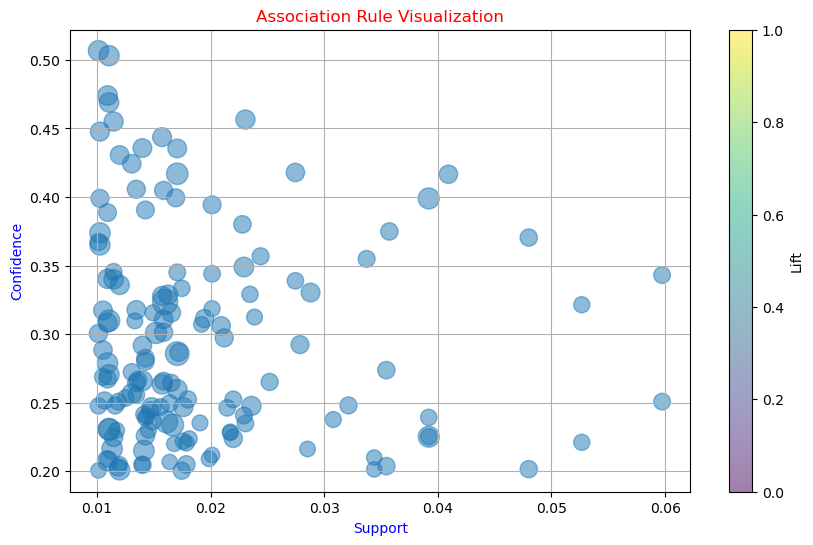

In [17]:
import matplotlib.pyplot as plt

# Assuming 'rules' is your DataFrame containing association rules
plt.figure(figsize=(10, 6))
plt.scatter(rules['support'], rules['confidence'], s=rules['lift']*100, alpha=0.5)
plt.xlabel('Support',color='blue')
plt.ylabel('Confidence',color='blue')
plt.title('Association Rule Visualization',color='red')
plt.colorbar(label='Lift')
plt.grid(True)
plt.show()

# **INTERVIEW QUESTIONS**

1.What is lift and why is it important in Association rules?

In association rule mining, lift is a metric used to evaluate the strength of an association rule by measuring how much more likely two items are to be purchased together compared to their independent occurrences.

Definition of Lift
For a rule 
𝑋
⇒
𝑌:


Lift is calculated as:


Lift(X⇒Y)= 
Support(X ∪ Y) / Support(X)×Support(Y) 

​

#Importance of Lift in Association Rules:

Lift is important because it helps determine the relevance and usefulness of a rule by:

Providing Contextual Insights: Lift considers the baseline probability of items, allowing for a more accurate measure of association than confidence alone.

Identifying Meaningful Patterns: High-lift rules identify combinations that occur significantly more frequently together than expected by chance, revealing strong dependencies or relationships that may be actionable.




2.	What is support and Confidence. How do you calculate them?

In association rule mining, support and confidence are key metrics that help evaluate the frequency and reliability of an association rule.

#Support

Support measures the frequency of a particular itemset (or combination of items) appearing in the dataset. It helps identify how commonly items or itemsets occur together.

For a rule 
X⇒Y:

Support of the rule is the proportion of transactions in the dataset that contain both 
X and Y.

Formula:

Support
(
𝑋
⇒
𝑌
)=
Number of transactions containing 
𝑋
 and 
𝑌
/ Total number of transactions



 #Confidence
 
Confidence measures the likelihood of item Y being present in a transaction given that item X is already present. It reflects the reliability of the association rule.

For a rule 
X⇒Y:

Confidence of the rule is the ratio of transactions containing both X and Y to the number of transactions that contain X alone.

Formula:

Confidence
(
𝑋
⇒
𝑌
)= Number of transactions containing 𝑋 and 𝑌 / Number of transactions containing 𝑋

 



3.	What are some limitations or challenges of Association rules mining?

The main limitations and challenges of association rule mining:

Computational Complexity: High memory and processing demands due to exponential item combinations.

Threshold Setting: Difficult to find appropriate support and confidence levels, risking missing key rules or producing too many.

Excessive Rules: Large numbers of often redundant or irrelevant rules make analysis overwhelming.

Redundancy: Many rules may overlap or repeat information, requiring filtering.

Lack of Temporal Analysis: Does not consider item order, missing sequential patterns.